In [1]:
from pinnsform import *
from pinnsform.model import PINNsformer, PINNsformer_linearemb, PINNsformerTanh
import matplotlib.pyplot as plt

In [2]:
device = 'cuda'

trained_model = PINNsformer_linearemb(d_out=1, d_hidden=512, d_model=32, N=1, heads=2).to(device)
init_model = PINNsformer(d_out=1, d_hidden=512, d_model=32, N=1, heads=2).to(device)
init_model_tanh = PINNsformerTanh(d_out=1, d_hidden=512, d_model=32, N=1, heads=2).to(device)
trained_model_tanh = PINNsformerTanh(d_out=1, d_hidden=512, d_model=32, N=1, heads=2).to(device)

problem_domain = ([0, 2*np.pi], [0, 1])
test_points = (201, 201)
test_mesh, _ = generate_mesh_object(test_points, domain=problem_domain, device=device, full_requires_grad=False, border_requires_grad=False, num_seq_steps=5, seq_step_size=1e-3)

In [3]:
base_dir = os.getcwd()
experiment_name = "PINNFORMER_TS" #'20240909_165419'
trained_path = os.path.join(base_dir, 'results', experiment_name, '51mesh', 'seed_1', 'trained_model.pth')
init_path = os.path.join(base_dir, 'results', experiment_name, 'InitWeights', 'seed_1', 'init_model.pth')
init_tanh_path = os.path.join(base_dir, 'results', experiment_name, '51mesh_tanh', 'seed_1', 'init_model.pth')
trained_tanh_path = os.path.join(base_dir, 'results', experiment_name, '51mesh_tanh', 'seed_1', 'trained_model.pth')

In [4]:
trained_model.load_state_dict(torch.load(trained_path))
init_model.load_state_dict(torch.load(init_path))
init_model_tanh.load_state_dict(torch.load(init_tanh_path))
trained_model_tanh.load_state_dict(torch.load(trained_tanh_path))

FileNotFoundError: [Errno 2] No such file or directory: '/local/upb/users/p/pauldf/profiles/unix/cs/pinnsformer/experiments/1d_reaction/pinnformer_ts/results/PINNFORMER_TS/20240924_120425/seed_1/init_model.pth'

In [5]:
def visualize_solution(model, mesh, mesh_shape, domain):
    prediction = f(model, mesh)[:,0].detach().cpu().numpy()
    predicted_mesh = np.reshape(prediction, mesh_shape)
    #[0,np.pi*2,1,0]
    plt.figure(figsize=(4,3))
    domain_extend = [domain[1][0], domain[1][1], domain[0][0], domain[0][1]]
    plt.imshow(predicted_mesh, extent=domain_extend, aspect='auto')
    plt.xlabel('t')
    plt.ylabel('x')
    plt.title('Predicted u(x,t)')
    plt.colorbar()
    plt.tight_layout()
    #plt.savefig('./1dreaction_pinnsformer_pred.png')
    plt.show()
    return predicted_mesh

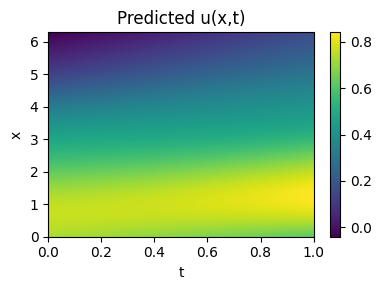

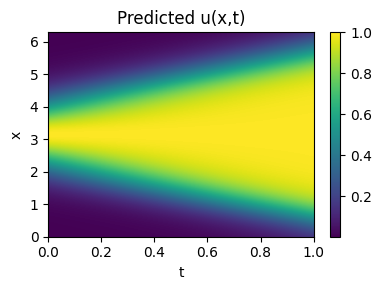

array([[0.00098121, 0.00103203, 0.00108416, ..., 0.15738767, 0.16075338,
        0.16417487],
       [0.00112174, 0.00116709, 0.00121334, ..., 0.16975538, 0.17332467,
        0.17695001],
       [0.00127633, 0.00131623, 0.00135866, ..., 0.18292876, 0.18670574,
        0.19054295],
       ...,
       [0.0018441 , 0.00186048, 0.00188168, ..., 0.17788975, 0.18155563,
        0.1852812 ],
       [0.00173618, 0.00174551, 0.0017587 , ..., 0.16724032, 0.17073208,
        0.17428078],
       [0.00162305, 0.00162685, 0.00163425, ..., 0.15739806, 0.16072454,
        0.16410385]], dtype=float32)

In [6]:
visualize_solution(init_model, test_mesh, test_points, problem_domain)
visualize_solution(trained_model, test_mesh, test_points, problem_domain)

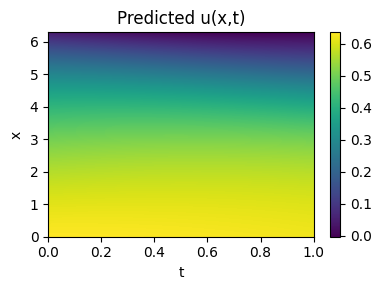

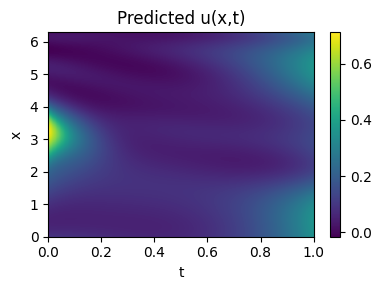

array([[0.01099288, 0.01190588, 0.01276338, ..., 0.28376117, 0.28823715,
        0.29275608],
       [0.01642197, 0.0172551 , 0.01802582, ..., 0.27250403, 0.27686703,
        0.28127062],
       [0.02034223, 0.0211077 , 0.02181393, ..., 0.26377368, 0.26803553,
        0.27233005],
       ...,
       [0.08327284, 0.08303151, 0.08280176, ..., 0.33982995, 0.34545198,
        0.3511346 ],
       [0.08758035, 0.08732167, 0.08706194, ..., 0.33893374, 0.3445215 ,
        0.3501632 ],
       [0.09219635, 0.09192342, 0.09162018, ..., 0.33808935, 0.34363103,
        0.3492392 ]], dtype=float32)

In [38]:
visualize_solution(init_model_tanh, test_mesh, test_points, problem_domain)
visualize_solution(trained_model_tanh, test_mesh, test_points, problem_domain)

In [35]:
RHO = 5.0

def h(x):
    return np.exp( - (x-np.pi)**2 / (2 * (np.pi/4)**2))

def u_ana(x,t):
    return h(x) * np.exp(RHO*t) / ( h(x) * np.exp(RHO*t) + 1 - h(x))

test_points = (201, 201)
test_mesh, _ = generate_mesh_object(test_points, domain=problem_domain, device=device, full_requires_grad=False, border_requires_grad=False, num_seq_steps=5, seq_step_size=1e-3)
print('TEST MESH')
print(test_mesh.part[0][:,0].shape)
print(test_mesh.part[1][:,0].shape)
print('#'*20)
analytic_solution = u_ana(test_mesh.part[0][:,0].cpu().numpy(), test_mesh.part[1][:,0].cpu().numpy())


TEST MESH
torch.Size([40401, 1])
torch.Size([40401, 1])
####################


In [56]:
analytic_mesh = np.reshape(analytic_solution, test_points)

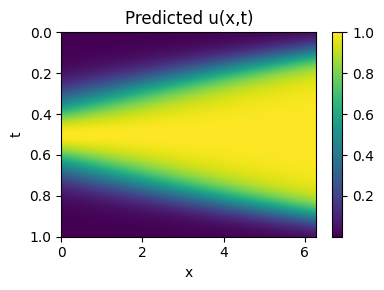

In [57]:
plt.figure(figsize=(4,3))
plt.imshow(analytic_mesh, extent=[0,np.pi*2,1,0], aspect='auto')
plt.xlabel('x')
plt.ylabel('t')
plt.title('Predicted u(x,t)')
plt.colorbar()
plt.tight_layout()
plt.savefig('./1dreaction_pinnsformer_pred.png')
plt.show()